# Data visualizazion for antibiotic efficacy on bacteria

## 1. Import packages and styles

In [1]:
# import packages
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# import seaborn style
sns.set()
sns.set_style('darkgrid')

## 2. Load data

The data consists on the dosage of antibiotic (mic = minimum inhibitory concentration) required to kill bacteria. Gram-type is also found in the dataset.

In [2]:
# load data from json
antibiotics_df = pd.read_json('data/burtin.json', orient='records').set_index(['bacteria', 'gram'])
antibiotics_df.head()

,,penicillin,streptomycin,neomycin
bacteria,gram,,,
Mycobacterium tuberculosis,negative,800.0,5.0,2.00
Salmonella schottmuelleri,negative,10.0,0.8,0.09
Proteus vulgaris,negative,3.0,0.1,0.10
Klebsiella pneumoniae,negative,850.0,1.2,1.00
Brucella abortus,negative,1.0,2.0,0.02


In [3]:
# reset index and set columns
antibiotics_df = antibiotics_df.stack().reset_index()
antibiotics_df.columns = ['bacteria', 'gram', 'antibiotic', 'mic']
antibiotics_df.head()

,bacteria,gram,antibiotic,mic
0,Mycobacterium tuberculosis,negative,penicillin,800.0
1,Mycobacterium tuberculosis,negative,streptomycin,5.0
2,Mycobacterium tuberculosis,negative,neomycin,2.0
3,Salmonella schottmuelleri,negative,penicillin,10.0
4,Salmonella schottmuelleri,negative,streptomycin,0.8


In [4]:
# link id to bacteria
bid_dict = {b:i for i, b in enumerate(sorted(pd.unique(antibiotics_df['bacteria'])))}
antibiotics_df['bid'] = antibiotics_df.apply(lambda x: bid_dict[x['bacteria']], 1)
antibiotics_df.head()

,bacteria,gram,antibiotic,mic,bid
0,Mycobacterium tuberculosis,negative,penicillin,800.0,6
1,Mycobacterium tuberculosis,negative,streptomycin,5.0,6
2,Mycobacterium tuberculosis,negative,neomycin,2.0,6
3,Salmonella schottmuelleri,negative,penicillin,10.0,10
4,Salmonella schottmuelleri,negative,streptomycin,0.8,10


In [5]:
# extract genus from bacteria columns
antibiotics_df['genus'] = antibiotics_df['bacteria'].apply(lambda x: x.split(" ")[0])
antibiotics_df.head()

,bacteria,gram,antibiotic,mic,bid,genus
0,Mycobacterium tuberculosis,negative,penicillin,800.0,6,Mycobacterium
1,Mycobacterium tuberculosis,negative,streptomycin,5.0,6,Mycobacterium
2,Mycobacterium tuberculosis,negative,neomycin,2.0,6,Mycobacterium
3,Salmonella schottmuelleri,negative,penicillin,10.0,10,Salmonella
4,Salmonella schottmuelleri,negative,streptomycin,0.8,10,Salmonella


## 3. Heatmap visual analysis

The heatmap is useful when in need of representing 3+ variables of data as x/y are used in conjuction with an additional variable mapped to color.

### 3.1 Antibiotic vs bacteria vs mic

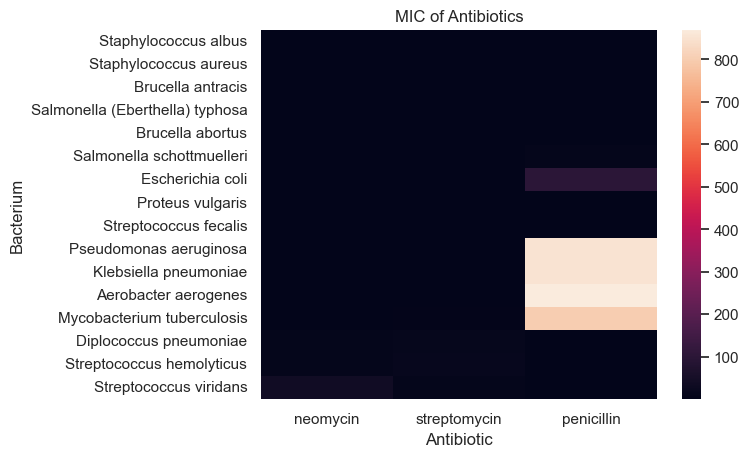

In [6]:
# df with bacteria, antibiotic and mic
tdf = antibiotics_df[['bacteria', 'antibiotic', 'mic']]

# set index and sort values
tdf = tdf.set_index(['bacteria', 'antibiotic']).unstack()['mic']
tdf = tdf.sort_values('neomycin')[['neomycin', 'streptomycin', 'penicillin']]

# heatmap, labels, title
ax = sns.heatmap(tdf)
ax.set_ylabel("Bacterium")
ax.set_xlabel("Antibiotic")
ax.set_title("MIC of Antibiotics");

### 3.2 Antibiotic vs bacteria vs mic (log scale)

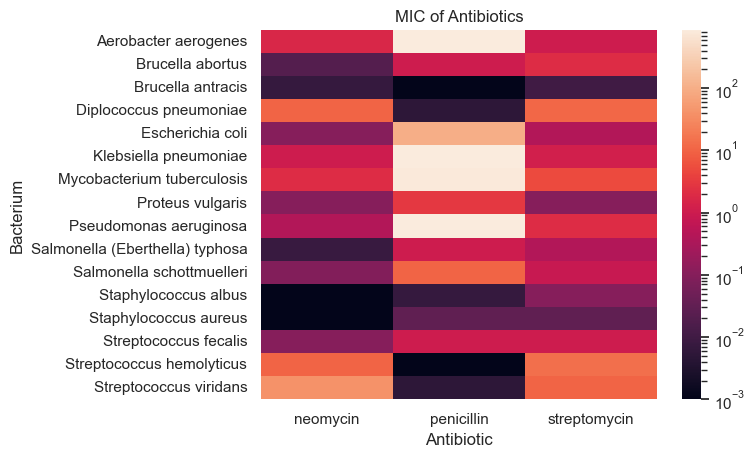

In [7]:
# import LogNorm
from matplotlib.colors import LogNorm

# df with bacteria, antibiotic and mic (unstacked)
tdf = antibiotics_df[['bacteria', 'antibiotic', 'mic']]
tdf = tdf.set_index(['bacteria', 'antibiotic']).unstack()['mic']

# use norm argument to scale values
ax = sns.heatmap(tdf, norm=LogNorm())
ax.set_ylabel("Bacterium")
ax.set_xlabel("Antibiotic")
ax.set_title("MIC of Antibiotics");

### 3.3 Antibiotic vs bacteria vs mic (log scale) sorted

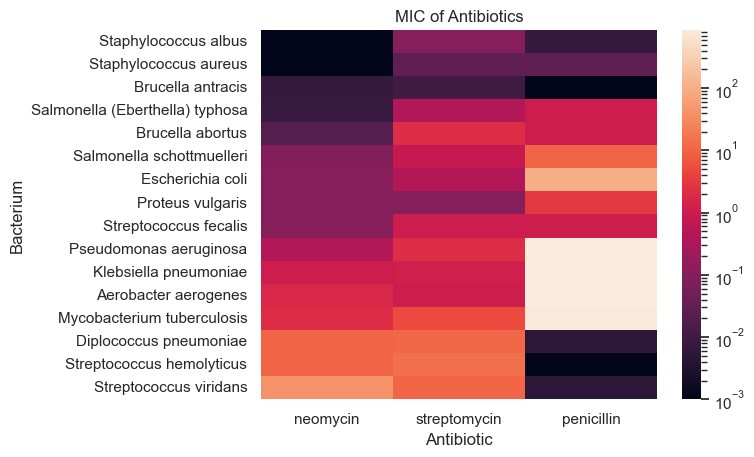

In [8]:
# sort by dosage of neomycin in ascending order

# df with bacteria, antibiotic and mic (unstacked)
tdf = antibiotics_df[['bacteria', 'antibiotic', 'mic']]
tdf = tdf.set_index(['bacteria', 'antibiotic']).unstack()['mic']

# sort values
tdf = tdf.sort_values('neomycin')[['neomycin', 'streptomycin', 'penicillin']]

# use norm argument to scale values
ax = sns.heatmap(tdf, norm=LogNorm())
ax.set_ylabel("Bacterium")
ax.set_xlabel("Antibiotic")
ax.set_title("MIC of Antibiotics");

### 3.4 Bar chart w/ transforms

#### 3.4.1 Antibiotic vs dosage (log scaled)

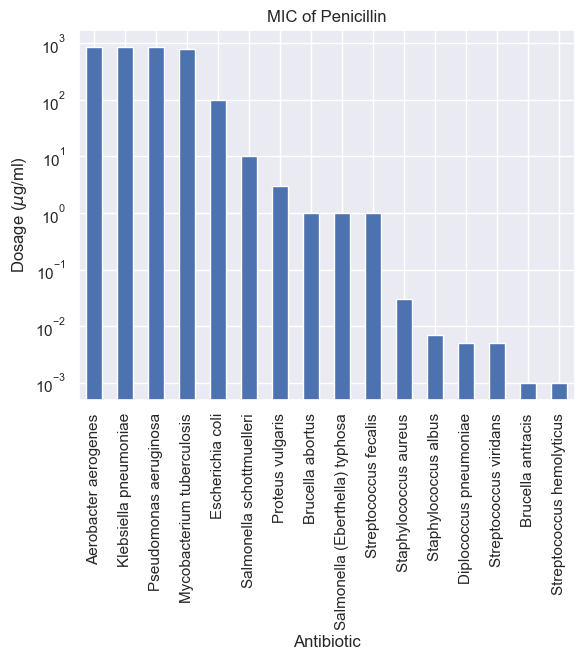

In [9]:
# df with bacteria, antibiotic and mic (unstacked)
tdf = antibiotics_df[['bacteria', 'antibiotic', 'mic']]
tdf = tdf.set_index(['bacteria', 'antibiotic']).unstack()['mic']

# sort values
ser = tdf['penicillin'].sort_values(ascending=False)

# log scale
ax = ser.plot.bar(logy=True)

# labels and title
ax.set_ylabel('Dosage ($\mu$g/ml)')
ax.set_xlabel("Antibiotic")
ax.set_title("MIC of Penicillin");

#### 3.4.2 Axis scale redefinition

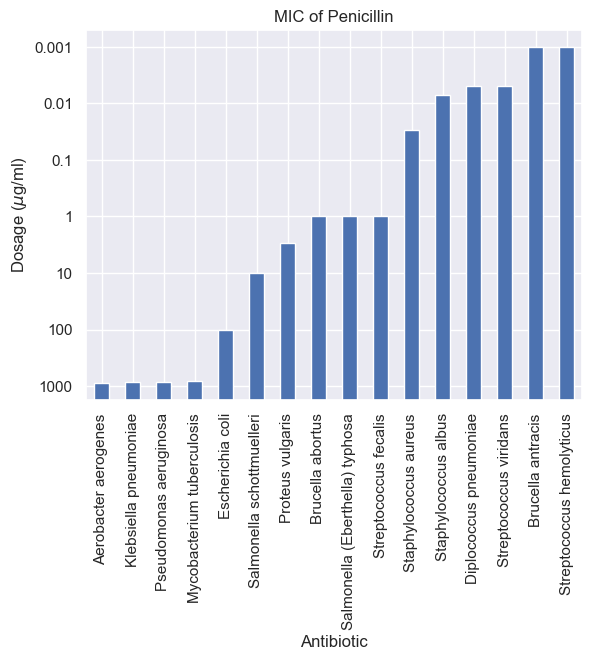

In [10]:
# df with bacteria, antibiotic and mic (unstacked)
tdf = antibiotics_df[['bacteria', 'antibiotic', 'mic']]
tdf = tdf.set_index(['bacteria', 'antibiotic']).unstack()['mic']

# sort values
ser = 1 / tdf['penicillin'].sort_values(ascending=False)

# log scale
ax = ser.plot.bar(logy=True)

# ticks and y label
ticks = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
ax.set_ylabel('Dosage ($\mu$g/ml)')
ax.set_yticks(ticks)
labels = ticks.copy()
labels.reverse()
ax.set_yticklabels(labels)

# x label and title
ax.set_xlabel("Antibiotic")
ax.set_title("MIC of Penicillin");

#### 3.4.3 Highlight positive/negative values for MIC

In [11]:
# color gram positive bacteria and gram negative bacteria differently

# df with bacteria, antibiotic, mic, gram
tdf = antibiotics_df[['bacteria', 'antibiotic', 'mic', 'gram']]
tdf = tdf.set_index(['bacteria', 'antibiotic', 'gram'])

# slice, reset index and sort values by mic
tdf = tdf.loc[(slice(None), 'penicillin'), :]
tdf = tdf.reset_index()
tdf = tdf.sort_values("mic", ascending=False)

# create mic inversed column
tdf['mic_inv'] = 1 / tdf['mic']

# check dataset format
tdf.head()

,bacteria,antibiotic,gram,mic,mic_inv
8,Aerobacter aerogenes,penicillin,negative,870.0,0.001149
3,Klebsiella pneumoniae,penicillin,negative,850.0,0.001176
5,Pseudomonas aeruginosa,penicillin,negative,850.0,0.001176
0,Mycobacterium tuberculosis,penicillin,negative,800.0,0.001250
6,Escherichia coli,penicillin,negative,100.0,0.010000


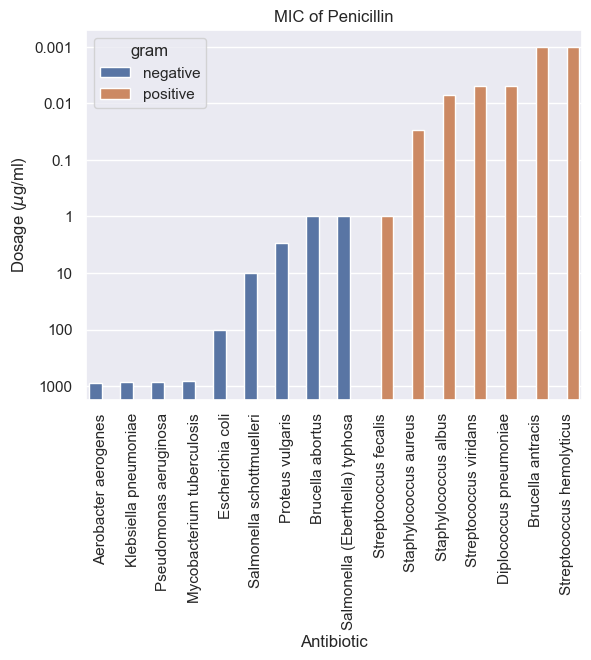

In [12]:
# barplot bacteria vs mic_inv
ax = sns.barplot(x="bacteria", y="mic_inv", hue="gram", log=True, data=tdf)

# set y label
ax.set_ylabel('Dosage ($\mu$g/ml)')

# set y ticks, reverse labels, title, x ticks
ticks = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
ax.set_yticks(ticks)
labels = ticks.copy()
labels.reverse()
ax.set_yticklabels(labels)
ax.set_xlabel("Antibiotic")
ax.set_title("MIC of Penicillin")
plt.xticks(rotation=90);